In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
results_folder = os.getcwd()
csv_details = "EXPERIMENTS.csv"
csv_explicit = "explicit.csv"
csv_implicit = "implicit.csv"
csv_init = "init.csv"

In [3]:
exp_details = pd.read_csv(results_folder+"/"+csv_details)
survey_explicit = pd.read_csv(results_folder+"/"+csv_explicit)
survey_implicit = pd.read_csv(results_folder+"/"+csv_implicit)
survey_init = pd.read_csv(results_folder+"/"+csv_init)

### Check if explicit -> implicit (or viceversa) sequence is preserved

No print -> no errors -> GOOD!

In [4]:
content = os.listdir(results_folder)
exp_dirs = [d for d in content if os.path.isdir(d)][1:-1]
exp_dirs = sorted(exp_dirs, key=lambda x: int(x.split("_")[0]))

In [5]:
df = pd.DataFrame(exp_dirs, columns = ['DIRNAME'] )
df['ID'] = df.DIRNAME.apply(lambda x: int(x.split('_')[0]))
df['ORDER'] = df.DIRNAME.apply(lambda x: int(x.split('_')[1]))
df['BEHAVIOR'] = df.DIRNAME.apply(lambda x: "explicit" if x.split('_')[2] == 'e' else "implicit")


In [6]:
# Check directories names - csv_details
for index in np.unique(df['ID']):
    if not (exp_details[exp_details['ID'] == index]['BEHAVIOR']).tolist() == (df[df['ID'] == index]['BEHAVIOR']).tolist():
        print("ERROR: for index "+str(index)+", there is a discrepancy between the order of the behaviors in the folder names and the order on the '"+csv_details+"' file.")

In [7]:
# Check if surveys have been done in the correct order
def get_datetime_from_survey(df_survey, index):
    timestamp = df_survey['Informazioni cronologiche'][index]
    temp = timestamp.split(" ")[0]+" "+timestamp.split(" ")[1]
    try:
        dd = datetime.strptime(temp, "%Y/%m/%d %H:%M:%S")
    except ValueError:
        dd = datetime.strptime(temp, "%d/%m/%Y %H.%M.%S")
    return dd
    
for index in np.unique(df['ID']):
    dt_explicit = get_datetime_from_survey(survey_explicit, index)
    dt_implicit = get_datetime_from_survey(survey_implicit, index)

    # If the first survey is "explicit"
    df_index = df[df['ID'] == index]
    if df_index[df_index['ORDER'] == 1]['BEHAVIOR'].equals('explicit') and dt_implicit < dt_explicit:
            print("ERROR: in Experiment "+str(index)+" explicit is before implicit but timestamps are inverted.")
    # If the first survey is "implicit"
    elif df_index[df_index['ORDER'] == 1]['BEHAVIOR'].equals('implicit') and dt_explicit < dt_implicit:
        print("ERROR: in Experiment "+str(index)+" implicit is before explicit but timestamps are inverted.")

### Check if age and gender in EXPERIMENTS is the same in SURVEY INIT

In [8]:
# AGE
ranges = []
for r in survey_init['In che range è la tua età:']:
    if "70" in r:
        ranges.append(range(70, 117))
    elif "18" in r:
        ranges.append(range(18, 30))
    else:
        min_r = int(r.split("-")[0])
        max_r = int(r.split("-")[1])+1
        ranges.append(range(min_r, max_r))
for i in range(len(exp_details)):
    exp = exp_details.iloc[i]
    exp_index = int(exp['ID'])
    if not exp['AGE'] in ranges[exp_index]:
        print("ERROR: age in experiments' details is different from one in init survey.")

In [9]:
# GENDER
genders = []
for gender in survey_init['Sono']:
    if gender == "Una donna":
        genders.append("female")
    else:
        genders.append("male")
        
        
for i in range(len(exp_details)):
    exp = exp_details.iloc[i]
    exp_index = int(exp['ID'])
    if exp['GENDER']!=genders[exp_index]:
        print("ERROR: gender in experiments' details is different from one in init survey.")

## Age and gender distribution

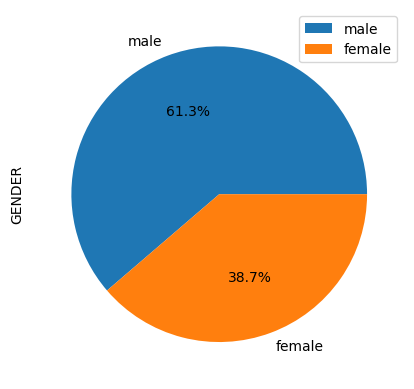

In [10]:
exp_details['GENDER'].value_counts().plot.pie(autopct="%1.1f%%", labels=['male', 'female'])
plt.legend()

In [11]:
exp_details['GENDER'].value_counts()

male      76
female    48
Name: GENDER, dtype: int64

In [12]:
print("Age mean:", np.mean(exp_details['AGE']))
print("Age std:", np.std(exp_details['AGE']))

Age mean: 34.193548387096776
Age std: 13.415011704126547


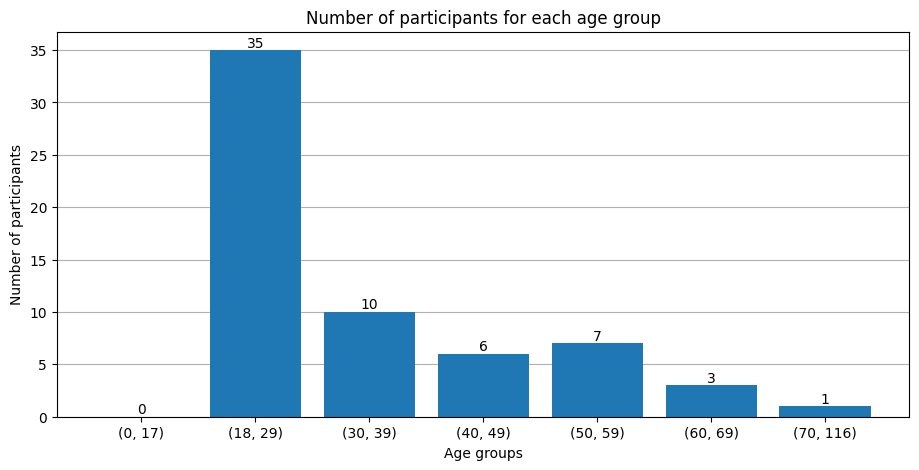

In [19]:
# From 3_experiment/pepper_behave.py
ranges = [range(0, 18), range(18, 30), range(30, 40), range(40, 50),
          range(50, 60), range(60, 70), range(70, 117)]

count_age_ranges = []
for r in ranges:
    count_age_range = sum([len(exp_details[exp_details['AGE'] == j]) for j in r])/2
    count_age_ranges.append(count_age_range)
    
ranges_axis = []

for r in ranges:
    ranges_axis.append("("+str(min(r))+", "+str(max(r))+")")
    
fig, ax = plt.subplots(1,1,figsize=(11, 5)) 

ax.set_axisbelow(True)
plt.grid(axis='y')
x_pos = np.arange(len(count_age_ranges))
plt.bar(x_pos, count_age_ranges, align='center')
plt.xticks(x_pos, ranges_axis)

for i in range(len(ranges_axis)):
    plt.text(i, count_age_ranges[i]+0.3, int(count_age_ranges[i]), ha = 'center')

plt.ylabel('Number of participants')
plt.xlabel('Age groups')
plt.title('Number of participants for each age group')
plt.show()

Remember that number of experiments is double of number of people.

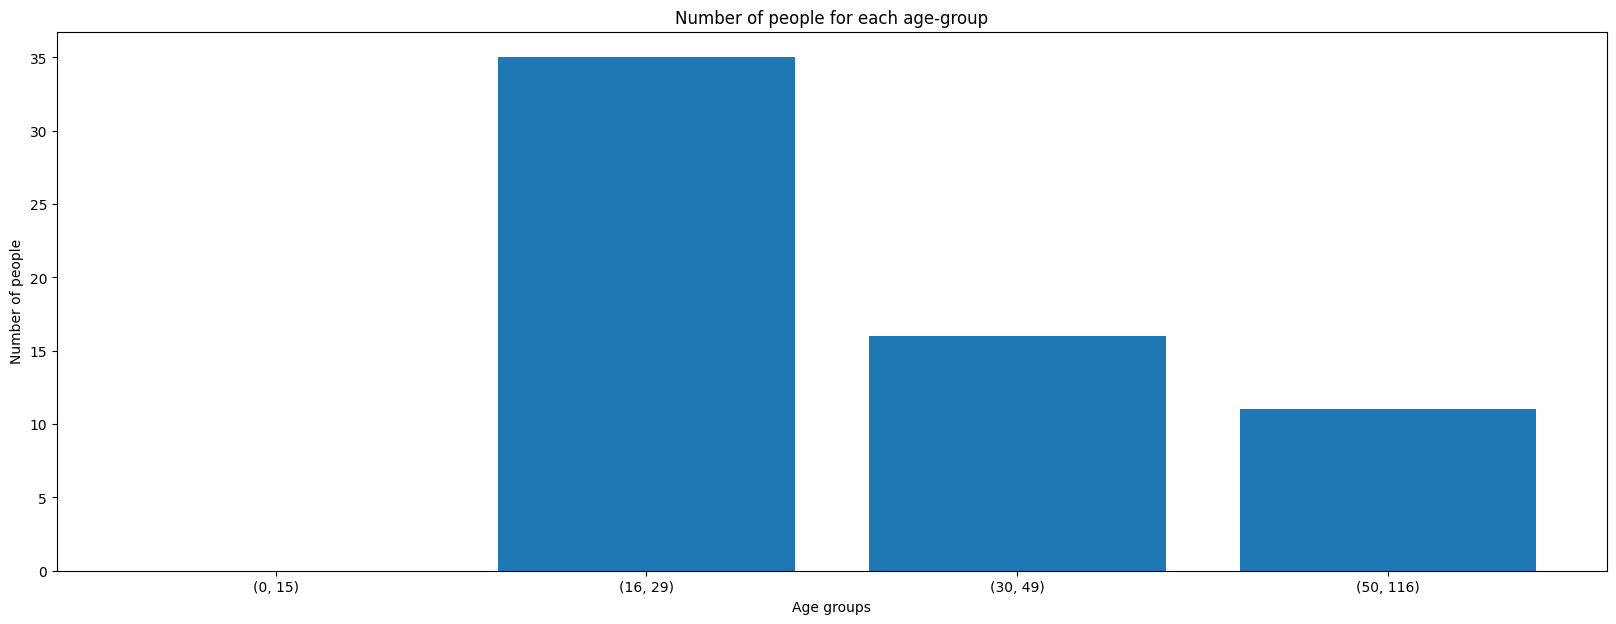

In [16]:
# From 16-29, 30-49 and 50-70
ranges = [range(0, 16), range(16, 30), range(30, 50), range(50, 117)]

count_age_ranges = []
for r in ranges:
    count_age_range = sum([len(exp_details[exp_details['AGE'] == j]) for j in r])/2
    count_age_ranges.append(count_age_range)
    
ranges_axis = []

for r in ranges:
    ranges_axis.append("("+str(min(r))+", "+str(max(r))+")")

x_pos = np.arange(len(count_age_ranges))
fig = plt.figure(dpi=100, figsize=(20, 7)) 
plt.bar(x_pos, count_age_ranges, align='center')
plt.xticks(x_pos, ranges_axis)
plt.ylabel('Number of people')
plt.xlabel('Age groups')
plt.title('Number of people for each age-group')
plt.show()

In [ ]:
# From 16-29, 30-49 and 50-70 
# Silent Generation 1928-45: 78-95y
# Baby Boomers 1946-64: 59-77y
# Generation X 1965-80: 43-58
# Millennials 1981-96: 27-42
# Zoomers 1997-2012: 11-26
ranges = [range(0, 11), range(11, 27), range(27, 43), range(43, 59),
         range(59, 78), range(78, 95)]

count_age_ranges = []
for r in ranges:
    count_age_range = sum([len(exp_details[exp_details['AGE'] == j]) for j in r])/2
    count_age_ranges.append(count_age_range)
    
ranges_axis = []

for r in ranges:
    ranges_axis.append("("+str(min(r))+", "+str(max(r))+")")

x_pos = np.arange(len(count_age_ranges))
fig = plt.figure(dpi=100, figsize=(20, 7)) 
plt.bar(x_pos, count_age_ranges, align='center')
plt.xticks(x_pos, ranges_axis)
plt.ylabel('Number of people')
plt.xlabel('Age groups')
plt.title('Number of people for each age-group')
plt.show()